# Fetching Dataset


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!unzip /content/drive/MyDrive/archive.zip -d /content/

Archive:  /content/drive/MyDrive/archive.zip
   creating: /content/archive/animals/
   creating: /content/archive/animals/cats/
  inflating: /content/archive/animals/cats/cats_00001.jpg  
  inflating: /content/archive/animals/cats/cats_00002.jpg  
  inflating: /content/archive/animals/cats/cats_00003.jpg  
  inflating: /content/archive/animals/cats/cats_00004.jpg  
  inflating: /content/archive/animals/cats/cats_00005.jpg  
  inflating: /content/archive/animals/cats/cats_00006.jpg  
  inflating: /content/archive/animals/cats/cats_00007.jpg  
  inflating: /content/archive/animals/cats/cats_00008.jpg  
  inflating: /content/archive/animals/cats/cats_00009.jpg  
  inflating: /content/archive/animals/cats/cats_00010.jpg  
  inflating: /content/archive/animals/cats/cats_00011.jpg  
  inflating: /content/archive/animals/cats/cats_00012.jpg  
  inflating: /content/archive/animals/cats/cats_00013.jpg  
  inflating: /content/archive/animals/cats/cats_00014.jpg  
  inflating: /content/archive/an

# Import Libraries

In [4]:
# Importing essential libraries for data processing, image handling, and visualization
import os  # For operating system interactions like file/directory handling
import cv2  # OpenCV library for image processing
import random  # For generating random numbers or shuffling data
import numpy as np  # For numerical operations on arrays and matrices
import pandas as pd  # For data manipulation and analysis
from tqdm import tqdm  # For displaying progress bars during iterations
import matplotlib.pyplot as plt  # For creating plots and visualizations
import seaborn as sns # For enhanced data visualization with additional styling and plot types
from collections import Counter  # Import Counter from the collections module to count occurrences of elements
from tqdm import tqdm #Import tqdm for the progress bar


# Directory

In [ ]:
#path configuration
data_path = "/content/archive/animals"

In [6]:
 #list of all subdirectories
sub_folder = os.listdir(data_path)  # List all subdirectories/files within the specified 'Animals' dataset directory
print(sub_folder)  # Display the list of subdirectories (animal categories) or files in the dataset

['panda', 'dogs', 'cats']


Construct the Path to the Sub-Directory

In [7]:
panda_folder = os.path.join(data_path, sub_folder[0])
print(panda_folder)

/content/archive/animals/panda


In [8]:
dog_folder = os.path.join(data_path, sub_folder[1])
print(dog_folder)

/content/archive/animals/dogs


In [9]:
#dir 1: cat
cat_folder = os.path.join(data_path, sub_folder[2])
print(cat_folder)

/content/archive/animals/cats


In [10]:
#Ensuring catagories path
categories = os.listdir(data_path)

print(categories)
for c in categories:
  print(f"Categories: {c}")
  print(f"Index: {categories.index(c)}")
  print(f"path: {os.path.join(data_path, c)}")

['panda', 'dogs', 'cats']
Categories: panda
Index: 0
path: /content/archive/animals/panda
Categories: dogs
Index: 1
path: /content/archive/animals/dogs
Categories: cats
Index: 2
path: /content/archive/animals/cats


# Data Preprocessing Part-I (Actual Image -> Grayscale)

In [11]:
cat_inage_1 = os.listdir(cat_folder)[0]
print(cat_inage_1)

cats_00417.jpg


In [12]:
read_cat_image = cv2.imread(os.path.join(cat_folder, cat_inage_1))
print(read_cat_image)

[[[162 192 187]
  [173 198 194]
  [154 171 168]
  ...
  [ 31  40  37]
  [ 11  22  19]
  [  8  19  16]]

 [[168 198 193]
  [166 191 187]
  [144 161 158]
  ...
  [ 32  41  38]
  [ 10  21  18]
  [  7  16  13]]

 [[156 186 181]
  [147 172 168]
  [127 144 141]
  ...
  [ 35  42  39]
  [ 13  22  19]
  [  8  15  12]]

 ...

 [[196 198 198]
  [194 196 196]
  [192 194 194]
  ...
  [190 192 192]
  [190 192 192]
  [189 191 191]]

 [[196 198 198]
  [194 196 196]
  [193 195 195]
  ...
  [189 191 191]
  [188 190 190]
  [187 189 189]]

 [[196 198 198]
  [195 197 197]
  [194 196 196]
  ...
  [186 188 188]
  [185 187 187]
  [184 186 186]]]


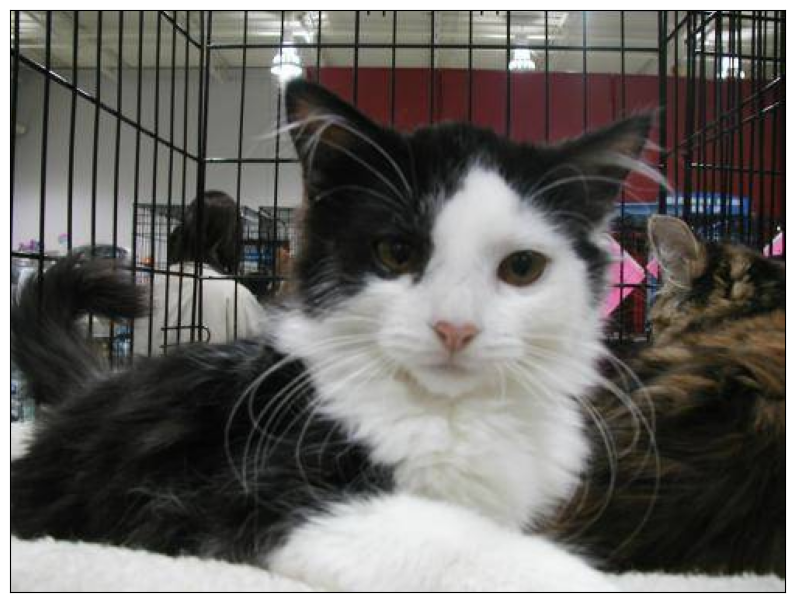

In [13]:
#Actual Image
actual_cat_image = cv2.cvtColor(read_cat_image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10,10))
plt.imshow(actual_cat_image)
plt.xticks([])
plt.yticks([])
plt.show()

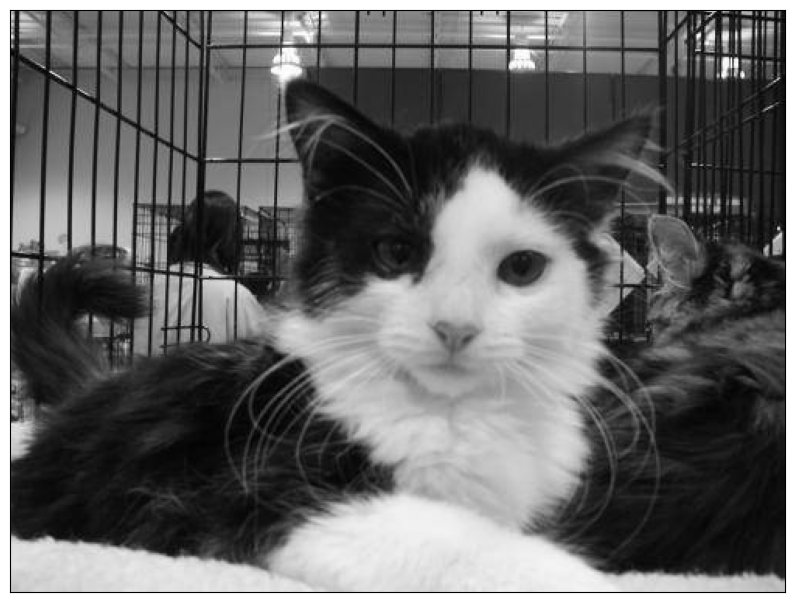

In [14]:
img_gray_cat = cv2.cvtColor(read_cat_image, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(10,10))
img_resized = cv2.resize(img_gray_cat, (32,32))
plt.imshow(img_gray_cat, cmap="gray")
plt.xticks([])
plt.yticks([])
plt.show()

# Data Preprocessing Part-II

In [36]:
#Train Dataset
train = []
label = []

for animals in categories:
  label.append(animals)
  animals_path = os.path.join(data_path, animals)

  count = 0
  for img_filename in tqdm(os.listdir(animals_path)):
    if count >= 100:
      break
    img_path = os.path.join(animals_path, img_filename)
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (32, 32))
    train.append([img, label.index(animals)])
    count += 1

print(f"\nTotal Images: {len(train)}")

 10%|█         | 100/1000 [00:00<00:00, 1845.06it/s]


Total Images: 300


In [43]:
from sklearn.model_selection import train_test_split

# Split 80% train, 20% test
actual_train, test_data = train_test_split(train, test_size=0.2, random_state=42)

In [37]:
#checing index value in traing data (before shuffling)
for index_value in range(10):
  print(train[index_value][1])

0
0
0
0
0
0
0
0
0
0


In [38]:
#Shuffle the data
random.shuffle(train)

In [39]:
#checing index value in traing data (after shuffling)
for index_value in range(10):
  print(train[index_value][1])

0
1
0
2
0
1
1
1
1
2


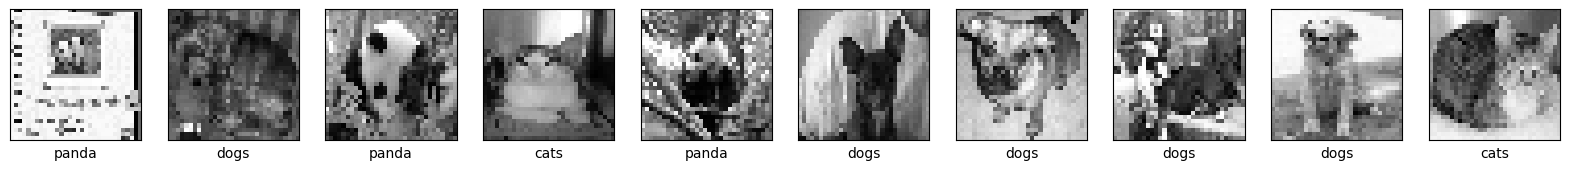

In [40]:
#image showcasing
plt.figure(figsize=(20, 5))
for i in range(10):
  plt.subplot(1, 10, i+1)
  plt.imshow(train[i][0], cmap="gray")
  plt.xlabel(label[train[i][1]])
  plt.xticks([])
  plt.yticks([])
plt.show()

In [20]:
#Calculate Fold Size:
fold_size = len(train) // 5
fold_size

60

In [21]:
#Fold of the dataset
folds = [train[i*fold_size:(i+1) * fold_size] for i in range(5)] #list comprehension
for i, fold in enumerate(folds):
  print(f"Fold {i+1}: {len(fold)} images")

Fold 1: 60 images
Fold 2: 60 images
Fold 3: 60 images
Fold 4: 60 images
Fold 5: 60 images


# Model Building and Evaluation (Using Manhattan L1 Distance)

In [44]:
# Manhattan (L1 distance)
def manhattan_distance(x1, x2):
    return np.sum(np.abs(x1 - x2))

In [45]:
# Model building using (L1) distances
def model_knn(train_data, k_values):
  train_data = np.array(train_data, dtype=object)
  all_accuracies = {} #dictionary for storing all accuracy

  for k in k_values:
    folds = np.array_split(train_data, 5) #split data into 5 folds
    fold_accuracies = []

    #cross-validation
    for i in range(5):
      validation_set = folds[i]
      training_set = np.concatenate([folds[j] for j in range(5) if j != i])
      correct_prediction = 0

      for v in validation_set:
        distances = []
        for t in training_set:
          d = manhattan_distance(t[0], v[0]) #find out manhattan distances
          distances.append([d, t[1]])        #store distances and lebel
        distances.sort()                     #sort the distances

        k_nearest_labels = [distances[j][1] for j in range(k)] #Get lebels of k nearsr neighber
        #determine most common lebel
        label_counts = Counter(k_nearest_labels)
        most_common_lebel = max(label_counts, key = label_counts.get)

        if most_common_lebel == v[1]: #compare with true lebel
          correct_prediction += 1

      #calculate accuracy for the fold
      accuracy = correct_prediction / len(validation_set) * 100
      fold_accuracies.append(accuracy)

    #print accuracy for each fold for the current k
    print(f"K: {k}")
    for fold_index, acc in enumerate(fold_accuracies, start=1):
      print(f"Fold {fold_index}: Accuracy: {acc:.2f}%")

    mean_accuracy = np.mean(fold_accuracies)
    print(f"Average Accuracy: {mean_accuracy:.2f}%\n")
    all_accuracies[k] = fold_accuracies

  return all_accuracies

k_values = range(1, 31)
manhattan_accuracies = model_knn(actual_train, k_values)


K: 1
Fold 1: Accuracy: 45.83%
Fold 2: Accuracy: 33.33%
Fold 3: Accuracy: 45.83%
Fold 4: Accuracy: 35.42%
Fold 5: Accuracy: 35.42%
Average Accuracy: 39.17%

K: 2
Fold 1: Accuracy: 45.83%
Fold 2: Accuracy: 33.33%
Fold 3: Accuracy: 45.83%
Fold 4: Accuracy: 35.42%
Fold 5: Accuracy: 35.42%
Average Accuracy: 39.17%

K: 3
Fold 1: Accuracy: 37.50%
Fold 2: Accuracy: 39.58%
Fold 3: Accuracy: 43.75%
Fold 4: Accuracy: 37.50%
Fold 5: Accuracy: 41.67%
Average Accuracy: 40.00%

K: 4
Fold 1: Accuracy: 35.42%
Fold 2: Accuracy: 31.25%
Fold 3: Accuracy: 41.67%
Fold 4: Accuracy: 41.67%
Fold 5: Accuracy: 43.75%
Average Accuracy: 38.75%

K: 5
Fold 1: Accuracy: 39.58%
Fold 2: Accuracy: 29.17%
Fold 3: Accuracy: 33.33%
Fold 4: Accuracy: 35.42%
Fold 5: Accuracy: 39.58%
Average Accuracy: 35.42%

K: 6
Fold 1: Accuracy: 39.58%
Fold 2: Accuracy: 33.33%
Fold 3: Accuracy: 35.42%
Fold 4: Accuracy: 37.50%
Fold 5: Accuracy: 39.58%
Average Accuracy: 37.08%

K: 7
Fold 1: Accuracy: 37.50%
Fold 2: Accuracy: 33.33%
Fold 3: A

# Model Building and Evaluation (Using Euclidean L2 Distance)

In [46]:
# Euclidean (L2) distance
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))

In [47]:
# Model building using (L2) distances
def model_knn(train_data, k_values):
  train_data = np.array(train_data, dtype=object)
  all_accuracies = {} #dictionary for storing all accuracy

  for k in k_values:
    folds = np.array_split(train_data, 5) #split data into 5 folds
    fold_accuracies = []

    #cross-validation
    for i in range(5):
      validation_set = folds[i]
      training_set = np.concatenate([folds[j] for j in range(5) if j != i])
      correct_prediction = 0

      for v in validation_set:
        distances = []
        for t in training_set:
          d = euclidean_distance(t[0], v[0]) #find out euclidean distances
          distances.append([d, t[1]])        #store distances and lebel
        distances.sort()                     #sort the distances

        k_nearest_labels = [distances[j][1] for j in range(k)] #Get lebels of k nearsr neighber
        #determine most common lebel
        label_counts = Counter(k_nearest_labels)
        most_common_lebel = max(label_counts, key = label_counts.get)

        if most_common_lebel == v[1]: #compare with true lebel
          correct_prediction += 1

      #calculate accuracy for the fold
      accuracy = correct_prediction / len(validation_set) * 100
      fold_accuracies.append(accuracy)

    #print accuracy for each fold for the current k
    print(f"K: {k}")
    for fold_index, acc in enumerate(fold_accuracies, start=1):
      print(f"Fold {fold_index}: Accuracy: {acc:.2f}%")

    mean_accuracy = np.mean(fold_accuracies)
    print(f"Average Accuracy: {mean_accuracy:.2f}%\n")
    all_accuracies[k] = fold_accuracies

  return all_accuracies

k_values = range(1, 31)
euclidean_accuracies = model_knn(actual_train, k_values)


K: 1
Fold 1: Accuracy: 50.00%
Fold 2: Accuracy: 39.58%
Fold 3: Accuracy: 43.75%
Fold 4: Accuracy: 29.17%
Fold 5: Accuracy: 37.50%
Average Accuracy: 40.00%

K: 2
Fold 1: Accuracy: 50.00%
Fold 2: Accuracy: 39.58%
Fold 3: Accuracy: 43.75%
Fold 4: Accuracy: 29.17%
Fold 5: Accuracy: 37.50%
Average Accuracy: 40.00%

K: 3
Fold 1: Accuracy: 43.75%
Fold 2: Accuracy: 41.67%
Fold 3: Accuracy: 43.75%
Fold 4: Accuracy: 37.50%
Fold 5: Accuracy: 35.42%
Average Accuracy: 40.42%

K: 4
Fold 1: Accuracy: 47.92%
Fold 2: Accuracy: 39.58%
Fold 3: Accuracy: 45.83%
Fold 4: Accuracy: 41.67%
Fold 5: Accuracy: 43.75%
Average Accuracy: 43.75%

K: 5
Fold 1: Accuracy: 50.00%
Fold 2: Accuracy: 45.83%
Fold 3: Accuracy: 43.75%
Fold 4: Accuracy: 41.67%
Fold 5: Accuracy: 35.42%
Average Accuracy: 43.33%

K: 6
Fold 1: Accuracy: 47.92%
Fold 2: Accuracy: 43.75%
Fold 3: Accuracy: 39.58%
Fold 4: Accuracy: 41.67%
Fold 5: Accuracy: 37.50%
Average Accuracy: 42.08%

K: 7
Fold 1: Accuracy: 47.92%
Fold 2: Accuracy: 45.83%
Fold 3: A

# Result and Analysis

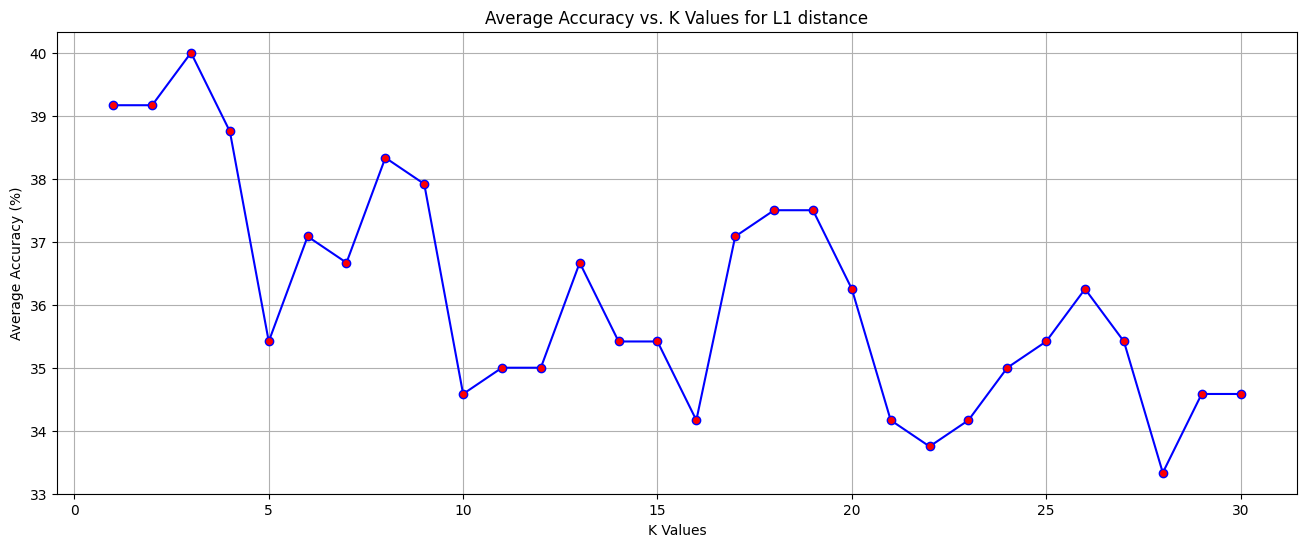

In [58]:
#graph for L1 distance
average_accuracies = {k: np.mean(acc) for k, acc in manhattan_accuracies.items()} #calculate the average accuracy for each k value

plt.figure(figsize=(16, 6))
plt.plot(
    list(average_accuracies.keys()),    #X- axis: K values
    list(average_accuracies.values()),  #Y- axis: Average accuracy for each K
    marker='o',                         #marker type to plot each point
    linestyle='-',                      #Line style (solid line)
    color='b',                          #Line color: blue
    markersize=6,                       #Size of the marker
    markerfacecolor='red'               #Color of the markers
)
plt.xlabel('K Values')
plt.ylabel('Average Accuracy (%)')
plt.title('Average Accuracy vs. K Values for L1 distance')
plt.grid(True)
plt.show()

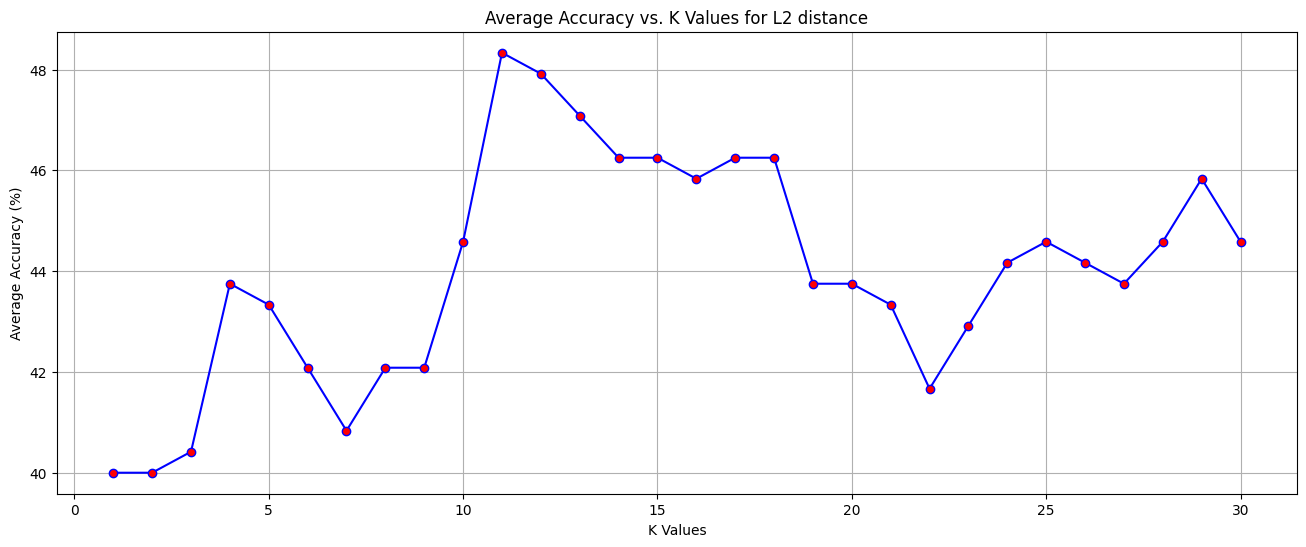

In [49]:
#graph for L2 distance
average_accuracies = {k: np.mean(acc) for k, acc in euclidean_accuracies.items()} #calculate the average accuracy for each k value

plt.figure(figsize=(16, 6))
plt.plot(
    list(average_accuracies.keys()),    #X- axis: K values
    list(average_accuracies.values()),  #Y- axis: Average accuracy for each K
    marker='o',                         #marker type to plot each point
    linestyle='-',                      #Line style (solid line)
    color='b',                          #Line color: blue
    markersize=6,                       #Size of the marker
    markerfacecolor='red'               #Color of the markers
)
plt.xlabel('K Values')
plt.ylabel('Average Accuracy (%)')
plt.title('Average Accuracy vs. K Values for L2 distance')
plt.grid(True)
plt.show()

# Discussion

Dataset Details:
  Classes: Dog, Cat, Panda.
  Total Images per Class: 1000
  Training Set: 100 images per class (total 300 images).
  Validation: 5-fold cross-validation.
  Distance Metrics Compared: Manhattan (L1) vs. Euclidean (L2).
  Input: Grayscale images.
  complexity of the classes: Due to confusing fold architecture of dataset a little bit of complexity was arrised.

L1 (Manhattan) Distance - Summary:
  Highest Accuracy: ~40.0% at k = 3.
  Accuracy Range: 33.5% to 40% (mostly fluctuates).
  Trend: Peaks early (k=3), then gradually declines with instability.

L2 (Euclidean) Distance - Summary:
  Highest Accuracy: ~48.33% at k = 11
  Accuracy Range: Starts at ~40%, steadily rises and stabilizes above 48%.
  Trend: Consistent improvement, then stabilizes with minor fluctuation.

Performance Comparison:
  L2 performs better than L1 across all k values.
  Maximum L2 accuracy (48.33%) is ~8.33% higher than maximum L1 accuracy (40%)
  L2 shows more stable and consistent performance.

Limitations:
  Small training set (only 100 images per class) may limit model performance.
  Raw pixel features used — no feature extraction (e.g., HOG, PCA, CNN) applied.
  Accuracy is relatively low for both metrics; improvements needed.

Recommendations:
  Increase training data size.
  Use feature extraction techniques.
  Normalize input data.
  Explore distance-weighted KNN.

# Top 5 prediction by L1 Model

In [54]:
def predict_knn(test_data, train_data, k):
    predictions = []
    for v in test_data:
        distances = []
        for t in train_data:
            d = manhattan_distance(t[0], v[0])
            distances.append([d, t[1]])
        distances.sort(key=lambda x: x[0])
        k_nearest_labels = [distances[j][1] for j in range(k)]
        label_counts = Counter(k_nearest_labels)
        most_common_label = max(label_counts, key=label_counts.get)
        predictions.append(most_common_label)
    return predictions

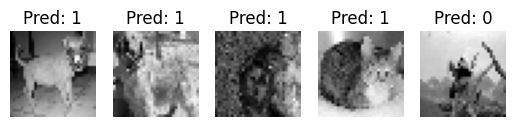

In [55]:
import matplotlib.pyplot as plt

test_predictions = predict_knn(test_data[:5], train, k=3)

for i, (image, label) in enumerate(test_data[:5]):
    plt.subplot(1, 5, i+1)
    plt.imshow(image.reshape(32, 32), cmap='gray')
    plt.title(f"Pred: {test_predictions[i]}")
    plt.axis('off')
plt.show()

# Top 5 Prediction by L2 Model

In [50]:
def predict_knn(test_data, train_data, k):
    predictions = []
    for v in test_data:
        distances = []
        for t in train_data:
            d = euclidean_distance(t[0], v[0])
            distances.append([d, t[1]])
        distances.sort(key=lambda x: x[0])
        k_nearest_labels = [distances[j][1] for j in range(k)]
        label_counts = Counter(k_nearest_labels)
        most_common_label = max(label_counts, key=label_counts.get)
        predictions.append(most_common_label)
    return predictions


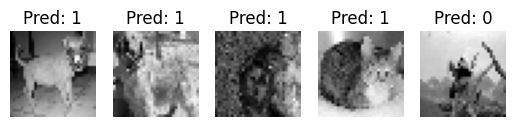

In [57]:
import matplotlib.pyplot as plt

test_predictions = predict_knn(test_data[:5], train, k=3)

for i, (image, label) in enumerate(test_data[:5]):
    plt.subplot(1, 5, i+1)
    plt.imshow(image.reshape(32, 32), cmap='gray')
    plt.title(f"Pred: {test_predictions[i]}")
    plt.axis('off')
plt.show()
